<a href="https://colab.research.google.com/github/vinhpeters/tf-exam/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification

## Creating example data

In [1]:
from sklearn.datasets import make_circles
import tensorflow as tf

In [2]:
n_samples = 1000
X ,y = make_circles(n_samples, noise = 0.03, random_state=42)

In [3]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
import pandas as pd


In [5]:
circles = pd.DataFrame({'X0': X[:,0], 'X1':X[:,1], 'label': y})

In [6]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
import matplotlib.pyplot as plt


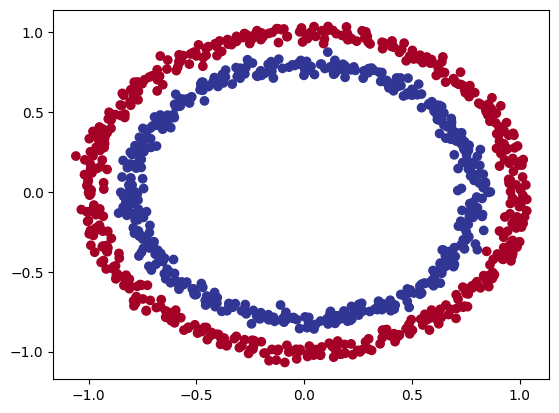

In [8]:
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X),len(y)

(1000, 1000)

In [11]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Building the model

In [12]:
tf.random.set_seed(42)


In [13]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics=['accuracy'] )

model_1.fit(X,y, epochs =5)

Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 4.3709 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 3.5010 - accuracy: 0.5140
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 7.7197 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 7.7178 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 12ms/step - loss: 7.7165 - accuracy: 0.5000


In [14]:
# No better than guessing
model_1.fit(X,y, epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 959us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [15]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics=['accuracy'] )

model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.8638 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.7261 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0378 - accuracy: 0.4550
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.5513 - accuracy: 0.4610
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

In [16]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving the model

In [17]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'] )

model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 3.0972 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8075 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4930
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4970
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4610
Epoch 11/

In [18]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.5070


[0.6996271014213562, 0.5070000290870667]

In [19]:
y_preds=model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


In [20]:
import numpy as np


In [21]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decison boundary created by a model predicting on X
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),np.linspace(y_min,y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print('multiclass')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred= np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu)
  plt.scatter(X[:,0], X[:,1],c=y,s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step


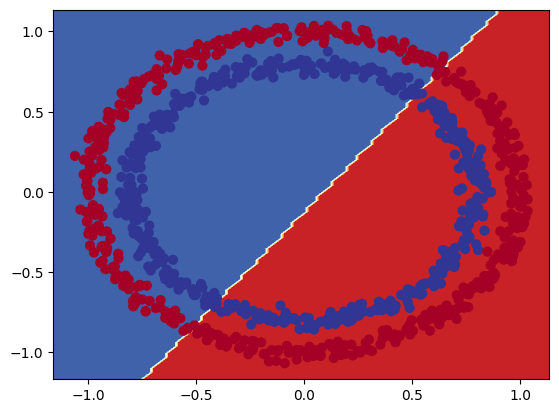

In [22]:
plot_decision_boundary(model_3, X, y)

In [23]:

X_regression=tf.range(0,1000,5)

y_regression=tf.range(100,1100,5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [24]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'] )
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 394.4286 - mae: 394.4286
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 306.7764 - mae: 306.7764
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 268.4142 - mae: 268.4142
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 254.2368 - mae: 254.2368
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 262.4971 - mae: 262.4971
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 263.9315 - mae: 263.9315
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 256.1161 - mae: 256.1161
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 252.9779 - mae: 252.9779
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 258.5447 - mae: 258.5447
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 257.4397 - mae: 257.4397
Epoch 11/100
5/5 [=====================

In [25]:
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

2/2 [==============================] - 0s 3ms/step


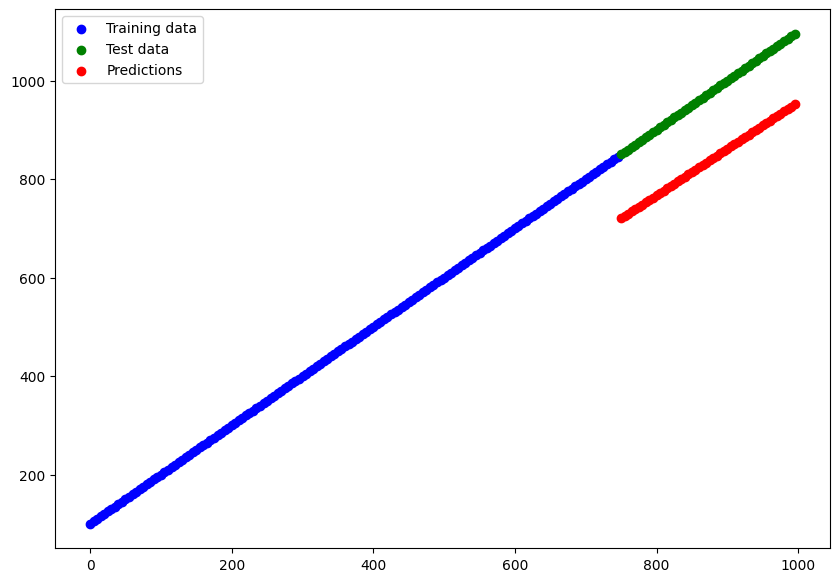

In [26]:
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data' )
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data' )
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions' )
plt.legend();

## Non-linearity

In [27]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential ([
    tf.keras.layers.Dense(1, activation = 'linear')
])

model_4.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
model_4.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2514 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2371 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 994us/step - loss: 6.2228 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2198 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1914 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1857 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1807 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1792 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1707 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1562 - accuracy: 0.4890
Epoch 1

313/313 [==============================] - 0s 1ms/step


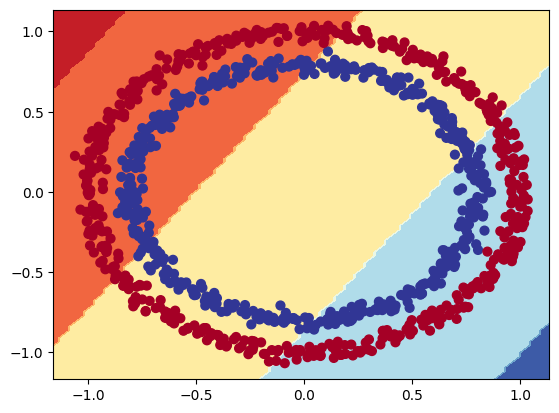

In [28]:
plot_decision_boundary(model_4, X, y)

## Non-linear activiation

In [29]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential ([
    tf.keras.layers.Dense(1, activation = 'relu')
])

model_5.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
history = model_5.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.3421 - accuracy: 0.4690
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3058 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2833 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2524 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2401 - accuracy: 0.4660
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2143 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1365 - accuracy: 0.4650
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1008 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0816 - accuracy: 0.4670
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0640 - accuracy: 0.4660
Epoch 11/

In [30]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential ([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_6.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
history = model_6.fit(X,y ,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.4970
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4970
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4950
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4980
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5010
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5020
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5040
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5040
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5080
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5090
Epoch 11/

In [31]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9900


[0.07950977981090546, 0.9900000095367432]

313/313 [==============================] - 0s 834us/step


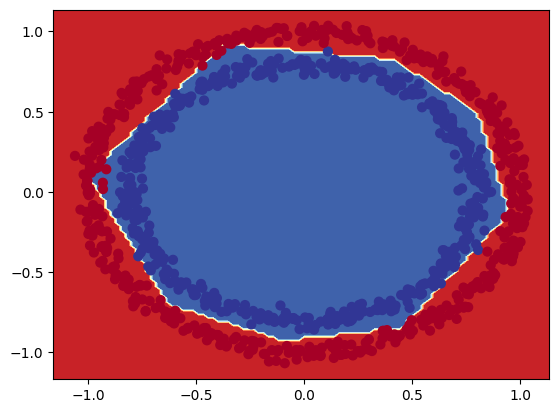

In [32]:
plot_decision_boundary(model_6, X, y)

In [33]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_7.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
history = model_7.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.7070 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7031 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.4850
Epoch 11/

313/313 [==============================] - 0s 942us/step


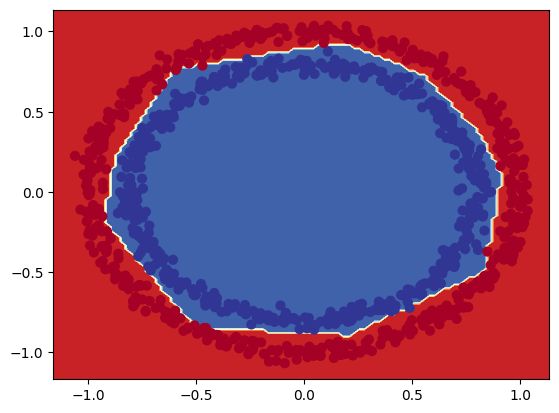

In [34]:
plot_decision_boundary(model_7,X,y)

In [35]:
A= tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

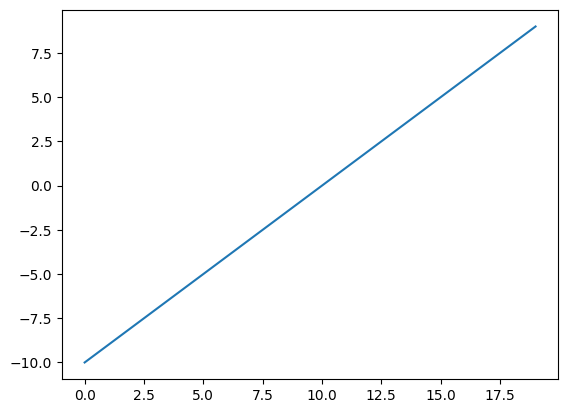

In [36]:
plt.plot(A);

In [37]:
def sigmoid(x):
  return 1 / (1+tf.exp(-x))
  

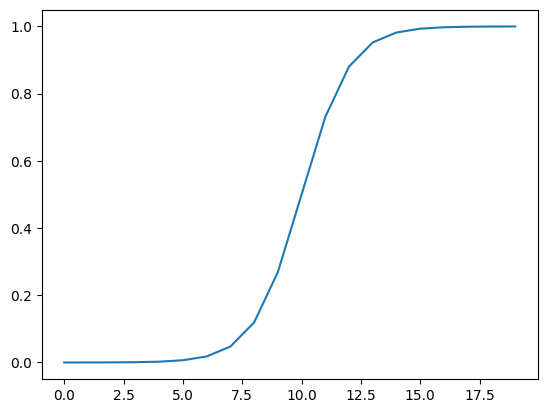

In [38]:
plt.plot(sigmoid(A));

In [39]:
def relu(x):
  return tf.maximum(x,0)

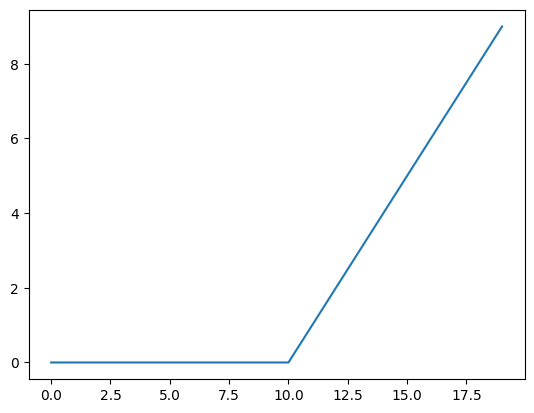

In [40]:
plt.plot(relu(A));

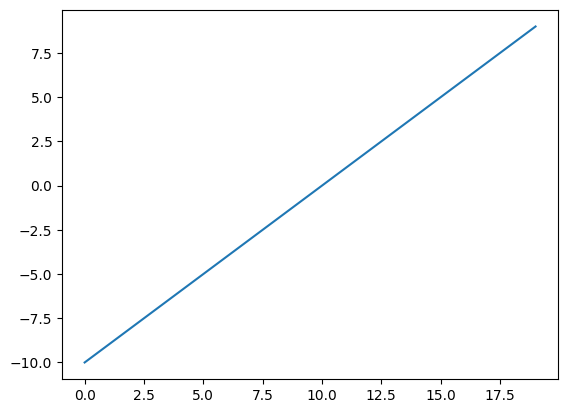

In [41]:
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classfication

In [42]:
len(X)

1000

In [43]:
# Create training and test set

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [44]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape 


((800, 2), (800,), (200, 2), (200,))

In [45]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_8.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) , metrics =['accuracy'])
history = model_8.fit(X_train,y_train ,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5113
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5200
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5500
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.5600
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6050
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.7250
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.7225
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.8025
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.8687
Epoch 11/25
25/25 [

313/313 [==============================] - 0s 779us/step


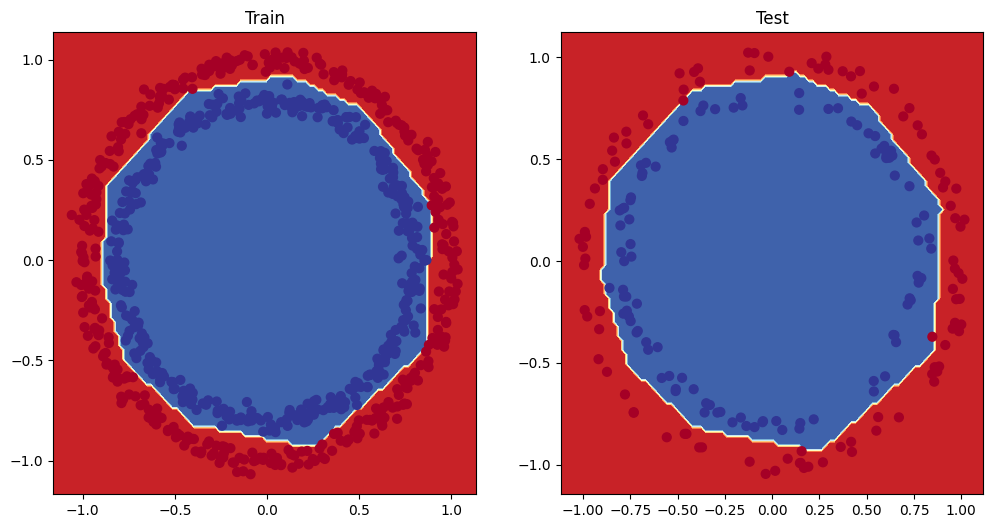

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [47]:
history.history

{'loss': [0.6935245394706726,
  0.6886839270591736,
  0.6843580603599548,
  0.6777330636978149,
  0.6710078716278076,
  0.6577479839324951,
  0.6319074034690857,
  0.6075542569160461,
  0.5583286881446838,
  0.4927622973918915,
  0.40904700756073,
  0.3306627571582794,
  0.26307791471481323,
  0.20387235283851624,
  0.1550520807504654,
  0.12382016330957413,
  0.10041134804487228,
  0.08498450368642807,
  0.07474159449338913,
  0.06311798840761185,
  0.05666029453277588,
  0.050954919308423996,
  0.04468880593776703,
  0.04209571331739426,
  0.03840566799044609],
 'accuracy': [0.5,
  0.5112500190734863,
  0.5199999809265137,
  0.550000011920929,
  0.5600000023841858,
  0.6050000190734863,
  0.7250000238418579,
  0.7225000262260437,
  0.8025000095367432,
  0.8687499761581421,
  0.9312499761581421,
  0.9487500190734863,
  0.9762499928474426,
  0.9862499833106995,
  0.9925000071525574,
  0.9987499713897705,
  1.0,
  0.9987499713897705,
  0.9937499761581421,
  0.9987499713897705,
  0.99624

In [48]:
pd.DataFrame(history.history)


,loss,accuracy
0,0.693525,0.50000
1,0.688684,0.51125
2,0.684358,0.52000
3,0.677733,0.55000
4,0.671008,0.56000
5,0.657748,0.60500
6,0.631907,0.72500
7,0.607554,0.72250
8,0.558329,0.80250
9,0.492762,0.86875


Text(0.5, 1.0, 'Model_8 loss curves')

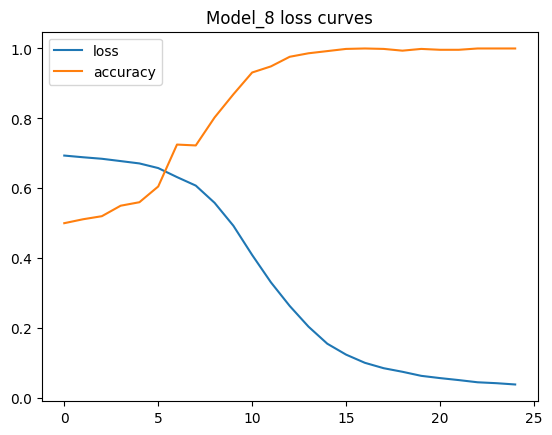

In [49]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

## Optimize learning rate

In [50]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_9.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])

# Learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(X_train,y_train ,epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7075 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7070 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.5138 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.5138 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7048 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

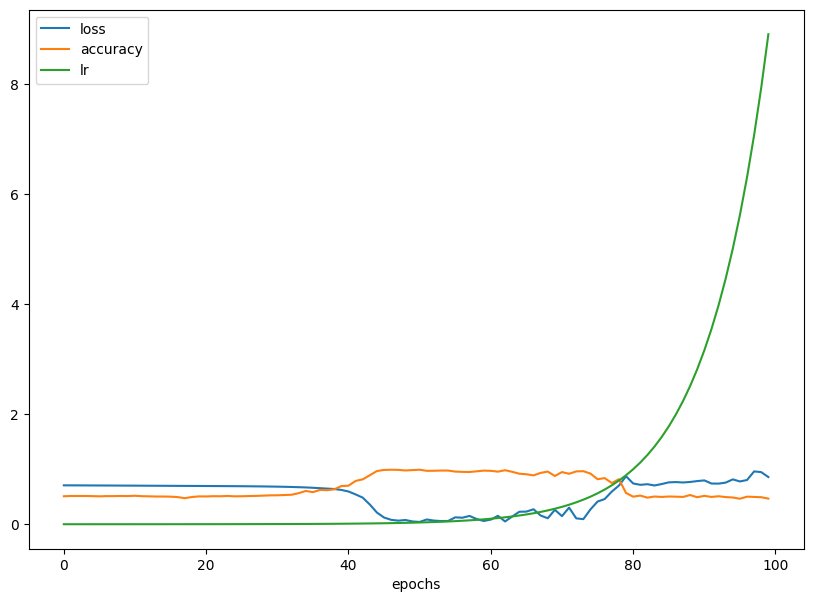

In [51]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs');


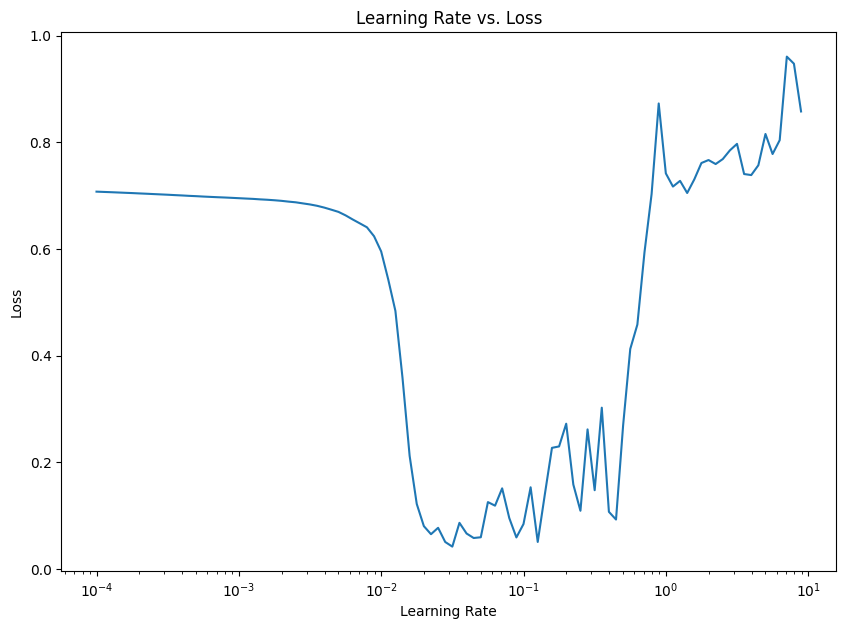

In [52]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history.get('loss'))
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title('Learning Rate vs. Loss')
plt.show();

In [53]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_10.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.02) , metrics =['accuracy'])


history = model_10.fit(X_train,y_train ,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6867 - accuracy: 0.5537
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.5913
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.6637
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.7525
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5251 - accuracy: 0.7925
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8850
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.9575
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.9812
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9950
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9975
Epoch 11/20
25/25 [

In [54]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9950


[0.03796985745429993, 0.9950000047683716]

313/313 [==============================] - 0s 786us/step


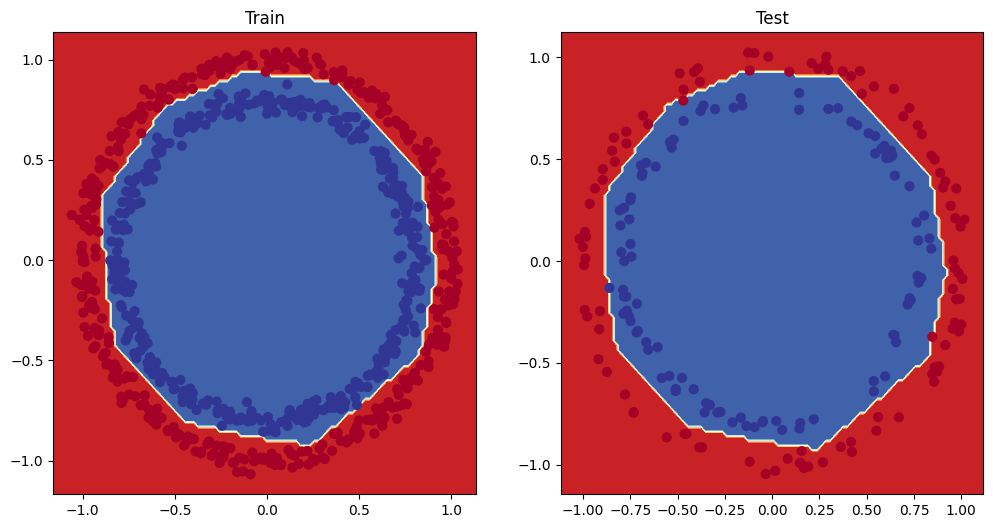

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10, X = X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X = X_test, y=y_test)
plt.show();

## More classification evaluation methods

In [56]:
loss, accuracy = model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9950


### Confusion matrix

In [57]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)
y_preds

7/7 [==============================] - 0s 2ms/step


array([[9.75534499e-01],
       [9.75534499e-01],
       [9.75534499e-01],
       [9.75534499e-01],
       [1.50205359e-01],
       [1.97554822e-04],
       [9.54903305e-01],
       [1.20818475e-02],
       [9.75534499e-01],
       [6.48217741e-03],
       [9.75534499e-01],
       [5.79797328e-01],
       [9.75534499e-01],
       [9.75534499e-01],
       [9.75534499e-01],
       [9.75534499e-01],
       [9.61502612e-01],
       [9.75534499e-01],
       [2.97159292e-02],
       [9.75534499e-01],
       [1.35261289e-04],
       [9.75534499e-01],
       [9.75534499e-01],
       [9.75534499e-01],
       [1.53207993e-02],
       [9.75422323e-01],
       [9.75534499e-01],
       [9.41755697e-02],
       [4.64886340e-04],
       [9.75534499e-01],
       [5.90995094e-03],
       [9.75534499e-01],
       [9.75534499e-01],
       [4.28617485e-02],
       [1.35300225e-02],
       [9.75534499e-01],
       [9.75534499e-01],
       [9.00428355e-01],
       [9.75534499e-01],
       [9.75534499e-01],


In [58]:
tf.round(y_preds)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [59]:
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

In [60]:
import itertools

figsize=(10,10)

cm = confusion_matrix(y_test, tf.round(y_preds))

cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
cm_norm

array([[0.99009901, 0.00990099],
       [0.        , 1.        ]])

In [61]:
cm.shape
n_classes = cm.shape[0]

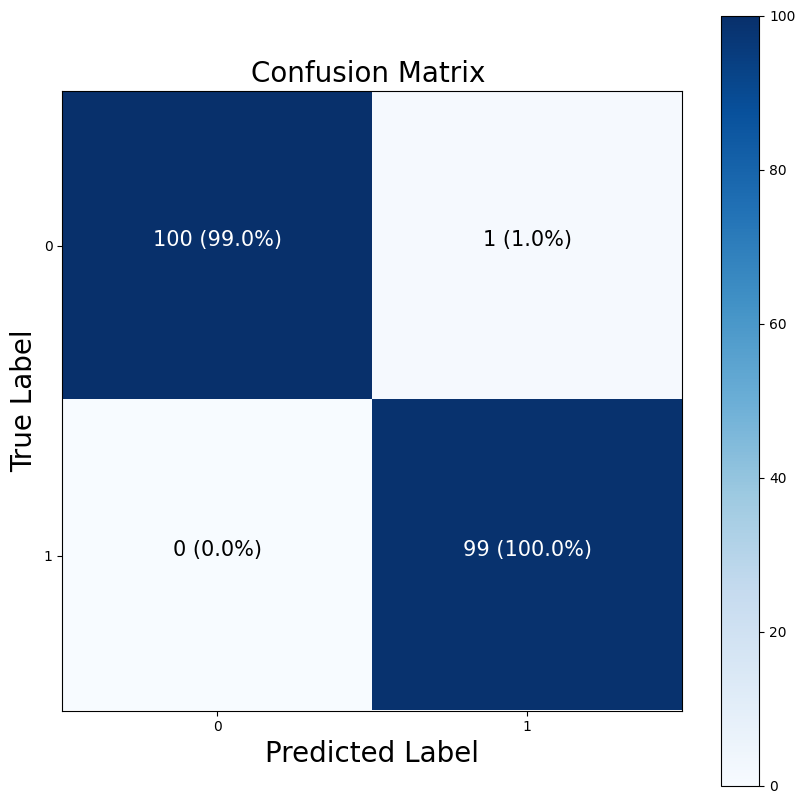

In [62]:
fig, ax =plt.subplots(figsize=figsize)

cax= ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
  labels= classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix ",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


threshold = (cm.max()+cm.min())/2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',horizontalalignment='center', color = 'white' if cm[i,j] > threshold else 'black', size = 15 )

## Mutli-class classification



In [63]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [64]:
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [65]:
# Data shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

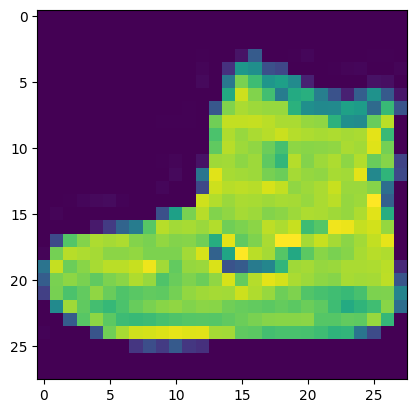

In [66]:
# Plot sample image
plt.imshow(train_data[0]);

In [67]:
class_names={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

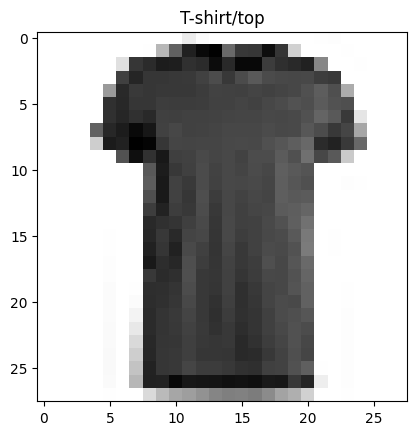

In [68]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]]);

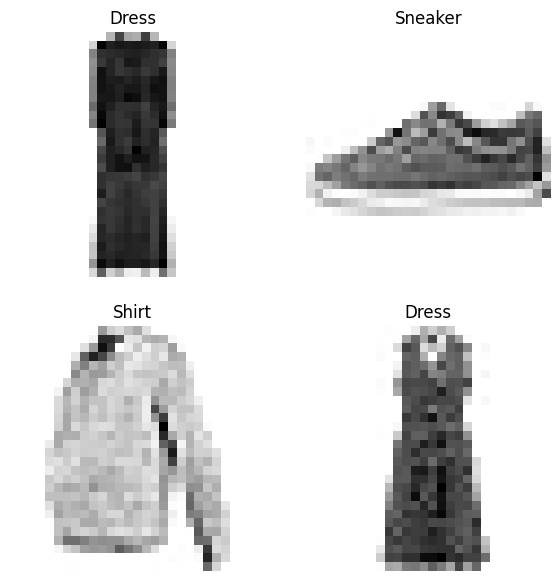

In [69]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [70]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])


history = model_11.fit(train_data, train_labels ,epochs=10, validation_data = (test_data, test_labels) )


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3761 - accuracy: 0.0981 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2996 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2492 - accuracy: 0.1243 - val_loss: 1.9126 - val_accuracy: 0.2226
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6947 - accuracy: 0.3351 - val_loss: 1.5740 - val_accuracy:

In [71]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [72]:
train_data.min(), train_data.max()

(0, 255)

In [73]:
# Normalize the data
train_data_norm = train_data/float(train_data.max())
test_data_norm = test_data/float(train_data.max())

In [74]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [75]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])


history_norm = model_12.fit(train_data_norm, train_labels ,epochs=10, validation_data = (test_data_norm, test_labels) )


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3895 - accuracy: 0.4725 - val_loss: 0.9981 - val_accuracy: 0.6467
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8722 - accuracy: 0.7056 - val_loss: 0.8159 - val_accuracy: 0.7369
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7517 - accuracy: 0.7440 - val_loss: 0.7377 - val_accuracy: 0.7505
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7030 - accuracy: 0.7527 - val_loss: 0.7041 - val_accuracy: 0.7543
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6769 - accuracy: 0.7591 - val_loss: 0.6884 - val_accuracy: 0.7571
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6600 - accuracy: 0.7632 - val_loss: 0.6770 - val_accuracy: 0.7619
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6488 - accuracy: 0.7656 - val_loss: 0.6723 - val_accuracy:

In [76]:
import pandas as pd

<Axes: title={'center': 'Normalized'}>

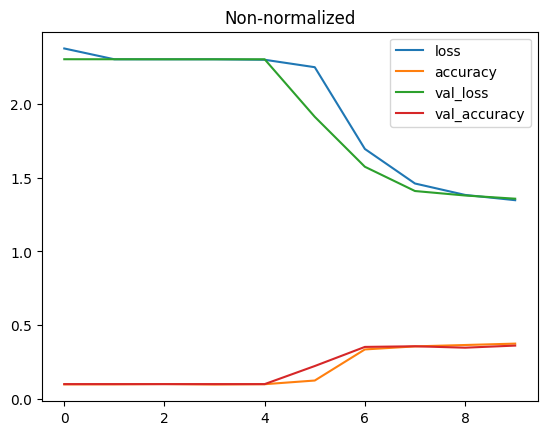

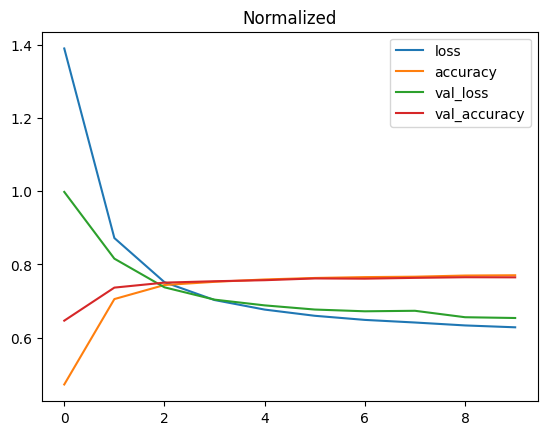

In [77]:
pd.DataFrame(history.history).plot(title='Non-normalized')
pd.DataFrame(history_norm.history).plot(title='Normalized')

## Optimize learning rate

In [78]:
tf.random.set_seed(42)


model_13 = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])


model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history = model_13.fit(train_data_norm, train_labels ,epochs=40, validation_data = (test_data_norm, test_labels), callbacks = [lr_scheduler] )

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4290 - accuracy: 0.5053 - val_loss: 1.1616 - val_accuracy: 0.5813 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0712 - accuracy: 0.6045 - val_loss: 1.0461 - val_accuracy: 0.6268 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9852 - accuracy: 0.6431 - val_loss: 0.9667 - val_accuracy: 0.6759 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9044 - accuracy: 0.6996 - val_loss: 0.9048 - val_accuracy: 0.7066 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8500 - accuracy: 0.7182 - val_loss: 0.8560 - val_accuracy: 0.7293 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7944 - accuracy: 0.7422 - val_loss: 0.8051 - val_accuracy: 0.7459 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0, 0.5, 'Loss')

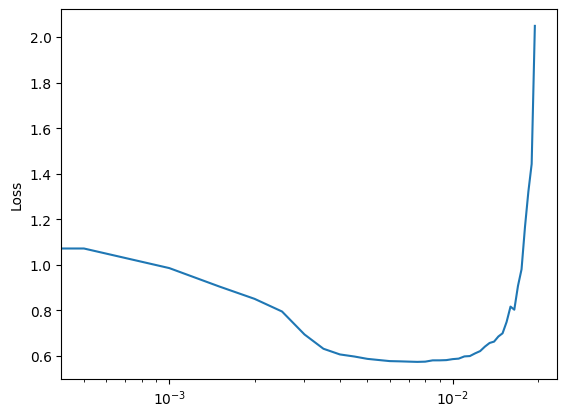

In [79]:
lrs= 1e-3 * (10*tf.range(40)/20)
plt.semilogx(lrs,history.history.get('loss'))
plt.ylabel('Loss')

In [80]:
tf.random.set_seed(42)


model_14 = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])


model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])


history = model_14.fit(train_data_norm, train_labels ,epochs=20, validation_data = (test_data_norm, test_labels), callbacks = [lr_scheduler] )

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5473 - accuracy: 0.3868 - val_loss: 1.2261 - val_accuracy: 0.4550 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1091 - accuracy: 0.5191 - val_loss: 1.0330 - val_accuracy: 0.5760 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9407 - accuracy: 0.6160 - val_loss: 0.9273 - val_accuracy: 0.6212 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8198 - accuracy: 0.6897 - val_loss: 0.7356 - val_accuracy: 0.7342 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6855 - accuracy: 0.7563 - val_loss: 0.6818 - val_accuracy: 0.7662 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6329 - accuracy: 0.7801 - val_loss: 0.6693 - val_accuracy: 0.7681 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 3s

In [81]:
import itertools

figsize=(10,10)

def make_confusion_matrix(y_true,y_pred, classes=None, figsize=(10,10), text_size=10):
  
  cm = confusion_matrix(y_true, y_pred)

  cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

  n_classes = cm.shape[0]

  fig, ax =plt.subplots(figsize=figsize)

  cax= ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix ",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  threshold = (cm.max()+cm.min())/2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',horizontalalignment='center', color = 'white' if cm[i,j] > threshold else 'black', size = text_size )

In [82]:
y_probs = model_14.predict(test_data_norm)

313/313 [==============================] - 0s 848us/step


In [83]:
y_probs[:5]

array([[3.4510915e-05, 1.2843679e-10, 4.0497844e-07, 5.4594751e-05,
        7.3149118e-07, 4.2279448e-02, 7.7639423e-05, 1.0857675e-01,
        1.7110624e-03, 8.4726477e-01],
       [9.3445992e-03, 7.8380283e-04, 6.9768906e-01, 2.8299890e-03,
        1.3976203e-01, 1.3658233e-12, 1.4954548e-01, 1.3107993e-23,
        4.5130982e-05, 1.6739808e-24],
       [1.7792199e-04, 9.7936600e-01, 4.8027327e-03, 3.3569958e-03,
        1.1954679e-02, 2.8589595e-31, 3.4157696e-04, 0.0000000e+00,
        1.1556400e-08, 1.0259801e-36],
       [4.8185029e-05, 9.7809434e-01, 3.1152679e-04, 1.6041748e-02,
        5.4484177e-03, 1.7324349e-32, 5.5688477e-05, 0.0000000e+00,
        3.3886224e-08, 3.3169460e-33],
       [2.9718220e-01, 4.2010462e-04, 7.9259083e-02, 6.6851720e-02,
        1.0612646e-02, 3.6349256e-06, 5.3423303e-01, 1.1995849e-08,
        1.1437543e-02, 2.1107842e-09]], dtype=float32)

In [84]:
y_pred = y_probs.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

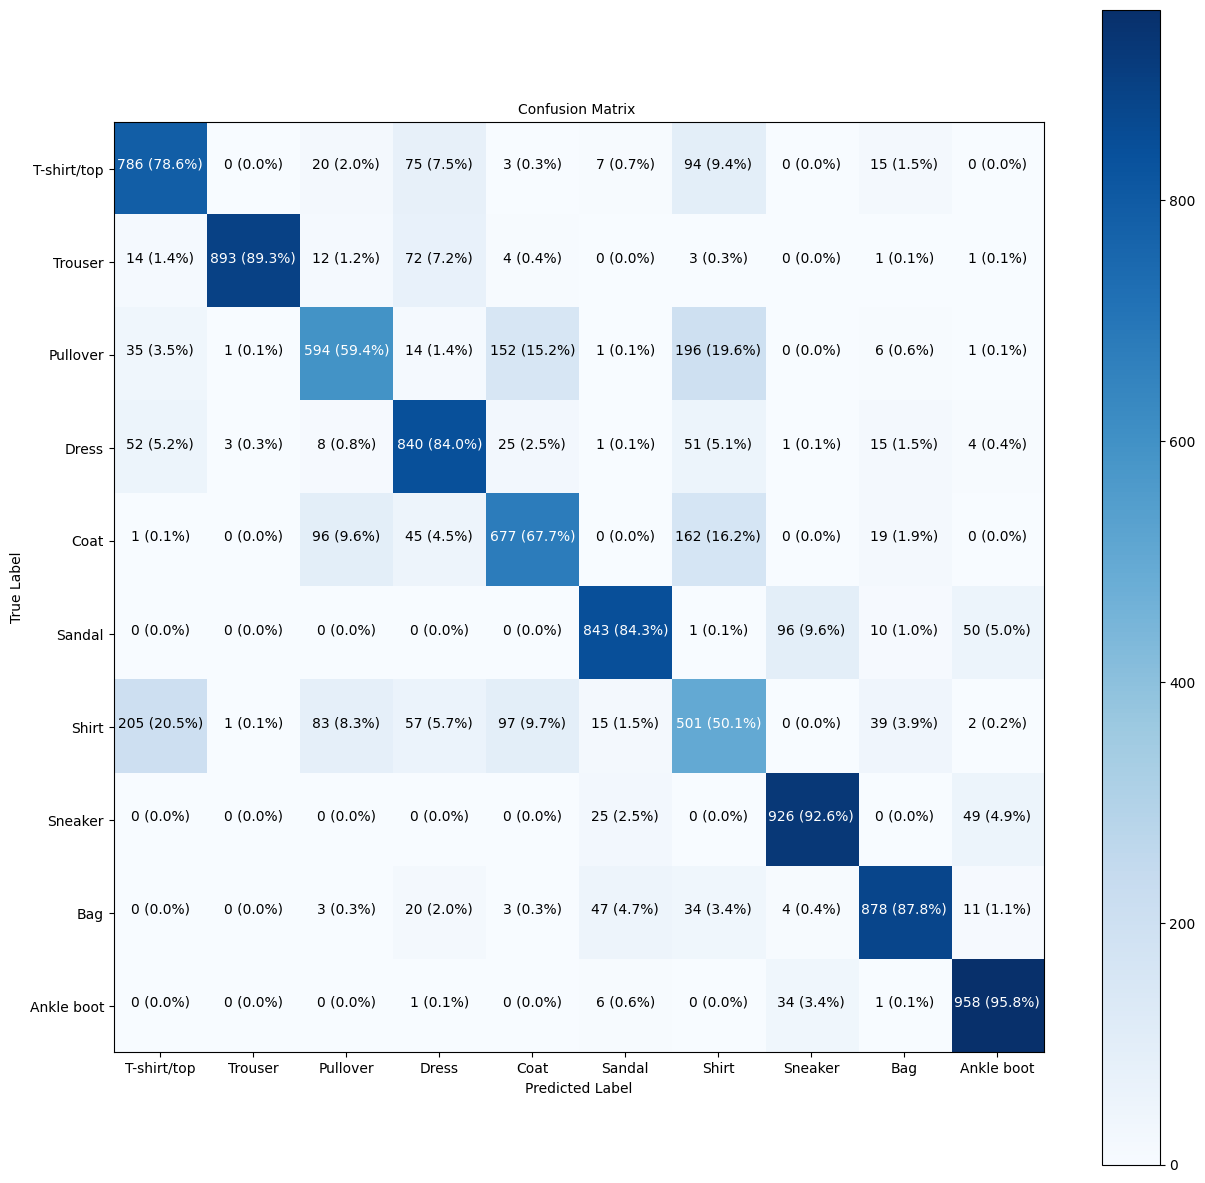

In [85]:
make_confusion_matrix(y_true = test_labels, y_pred=y_pred , classes= class_names.values(), figsize=(15,15))

In [86]:
def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a  random image and plots it with the true label and predicated label
  '''

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color='g'
  else:
    color = 'r'

  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label}) ", color = color)



1/1 [==============================] - 0s 16ms/step


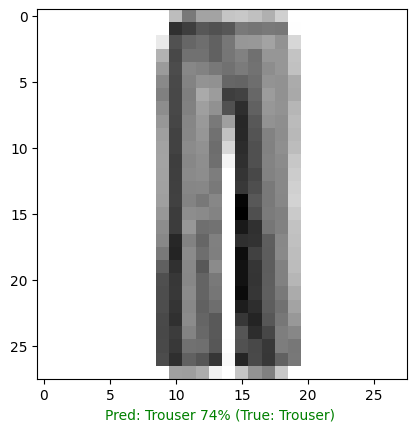

In [87]:
plot_random_image(model=model_14, images = test_data_norm, true_labels = test_labels, classes = class_names)

## Pattern exploration

In [88]:
model_14.layers

In [101]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [90]:
model_14.layers[1]

In [98]:
weights, biases = model_14.layers[1].get_weights()

In [99]:
weights, weights.shape

(array([[-5.9262641e-02, -1.8072610e+00,  9.3386936e-01,  2.7209713e+00],
        [ 2.1122769e-03, -5.0122571e+00,  1.0860857e+00,  2.4897685e+00],
        [ 6.8665281e-02, -4.3935742e+00, -1.8677127e+00,  2.6618364e+00],
        ...,
        [-3.3814985e-02, -8.3468854e-01, -1.3076054e-01,  4.9868408e-01],
        [ 1.4174703e-02,  6.6995090e-01,  1.5807265e-02, -1.8483721e-01],
        [ 3.2439694e-02,  2.9362127e-01,  6.5506130e-01,  8.5672629e-01]],
       dtype=float32),
 (784, 4))

In [100]:
biases, biases.shape

(array([-0.02304059,  4.2454495 ,  1.4673505 ,  6.034502  ], dtype=float32),
 (4,))

In [102]:
from tensorflow.keras.utils import plot_model

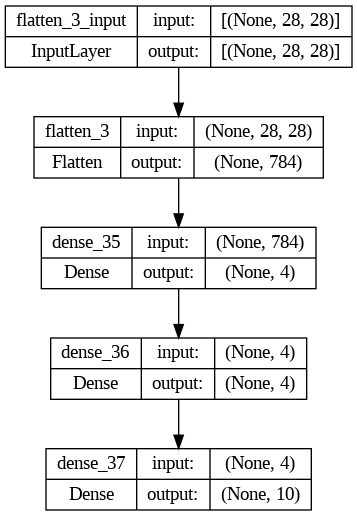

In [103]:
plot_model(model_14, show_shapes=True)